# Users EDA

Goal: Analyze users-level attributes


In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from debugpy.adapter.components import missing

# from ydata_profiling import ProfileReport

from mastercard import dist_visualisation, dist_categorical_visualisation

2025-06-08 10:08:35.974 | INFO     | mastercard.config:<module>:11 - PROJ_ROOT path is: /home/marcin/workspace/data_sience/mastercard


In [2]:
PROCESSED_DATA_DIR = Path("../data/processed")
FIGURES_DIR = Path("../reports/figures")
df = pd.read_parquet(PROCESSED_DATA_DIR / "users.parquet")

In [3]:
print("Initial shape:", df.shape)

Initial shape: (20000, 10)


In [4]:
df.columns


Index(['user_id', 'age', 'sex', 'education', 'primary_source_of_income',
       'sum_of_monthly_installments', 'sum_of_monthly_expenses', 'country',
       'signup_date', 'risk_score'],
      dtype='object')

In [5]:
df.head()

,user_id,age,sex,education,primary_source_of_income,sum_of_monthly_installments,sum_of_monthly_expenses,country,signup_date,risk_score
0,U00001,56,Other,High School,Employment,477.69,243.18,Finland,2021-04-01,0.571079
1,U00002,36,Female,Bachelor,Business,31.60,737.76,France,2020-07-07,0.705268
2,U00003,70,Other,High School,Student Aid,275.72,1477.50,Finland,2022-08-23,0.429579
3,U00004,38,Other,High School,Savings,288.29,1135.03,Belgium,2022-05-21,0.581384
4,U00005,61,Male,High School,Employment,7.00,892.76,Italy,2022-03-15,0.420227


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      20000 non-null  object 
 1   age                          20000 non-null  int64  
 2   sex                          20000 non-null  object 
 3   education                    16138 non-null  object 
 4   primary_source_of_income     20000 non-null  object 
 5   sum_of_monthly_installments  20000 non-null  float64
 6   sum_of_monthly_expenses      20000 non-null  float64
 7   country                      20000 non-null  object 
 8   signup_date                  20000 non-null  object 
 9   risk_score                   20000 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.5+ MB


In [7]:
df["signup_date"] = pd.to_datetime(df["signup_date"])

In [8]:
df.head()

,user_id,age,sex,education,primary_source_of_income,sum_of_monthly_installments,sum_of_monthly_expenses,country,signup_date,risk_score
0,U00001,56,Other,High School,Employment,477.69,243.18,Finland,2021-04-01,0.571079
1,U00002,36,Female,Bachelor,Business,31.60,737.76,France,2020-07-07,0.705268
2,U00003,70,Other,High School,Student Aid,275.72,1477.50,Finland,2022-08-23,0.429579
3,U00004,38,Other,High School,Savings,288.29,1135.03,Belgium,2022-05-21,0.581384
4,U00005,61,Male,High School,Employment,7.00,892.76,Italy,2022-03-15,0.420227


In [9]:
missing = df.isnull().sum()
print("Explicit Missing Value: \n", missing[missing > 0])

Explicit Missing Value: 
 education    3862
dtype: int64


In [10]:
categorical_cols = ["sex", "education", "primary_source_of_income", "country"]

In [11]:
df["education"].value_counts()

education
PhD            4162
Master         4019
Bachelor       4011
High School    3946
Name: count, dtype: int64

In [12]:
df.loc[df["education"].isna()]

,user_id,age,sex,education,primary_source_of_income,sum_of_monthly_installments,sum_of_monthly_expenses,country,signup_date,risk_score
5,U00006,33,Male,None,Savings,79.49,113.97,Poland,2021-06-28,0.482379
7,U00008,24,Other,None,Unemployment,56.09,80.72,Italy,2024-12-10,0.484288
8,U00009,21,Female,None,Retirement,855.24,994.18,Portugal,2021-01-16,0.478967
16,U00017,62,Female,None,Business,45.57,1944.58,Finland,2020-07-12,0.398462
23,U00024,43,Male,None,Student Aid,80.75,354.97,Italy,2022-09-02,0.619339
...,...,...,...,...,...,...,...,...,...,...
19978,U19979,37,Other,None,Retirement,22.04,94.51,Belgium,2024-11-15,0.558565
19983,U19984,22,Female,None,Unemployment,15.99,1776.45,Austria,2021-09-06,0.817778
19986,U19987,70,Other,None,Student Aid,440.07,2010.91,Italy,2020-12-06,0.392217
19997,U19998,53,Other,None,Unemployment,142.07,281.32,Austria,2022-05-31,0.411991


In [13]:
df["education"] = df["education"].fillna("Missing")

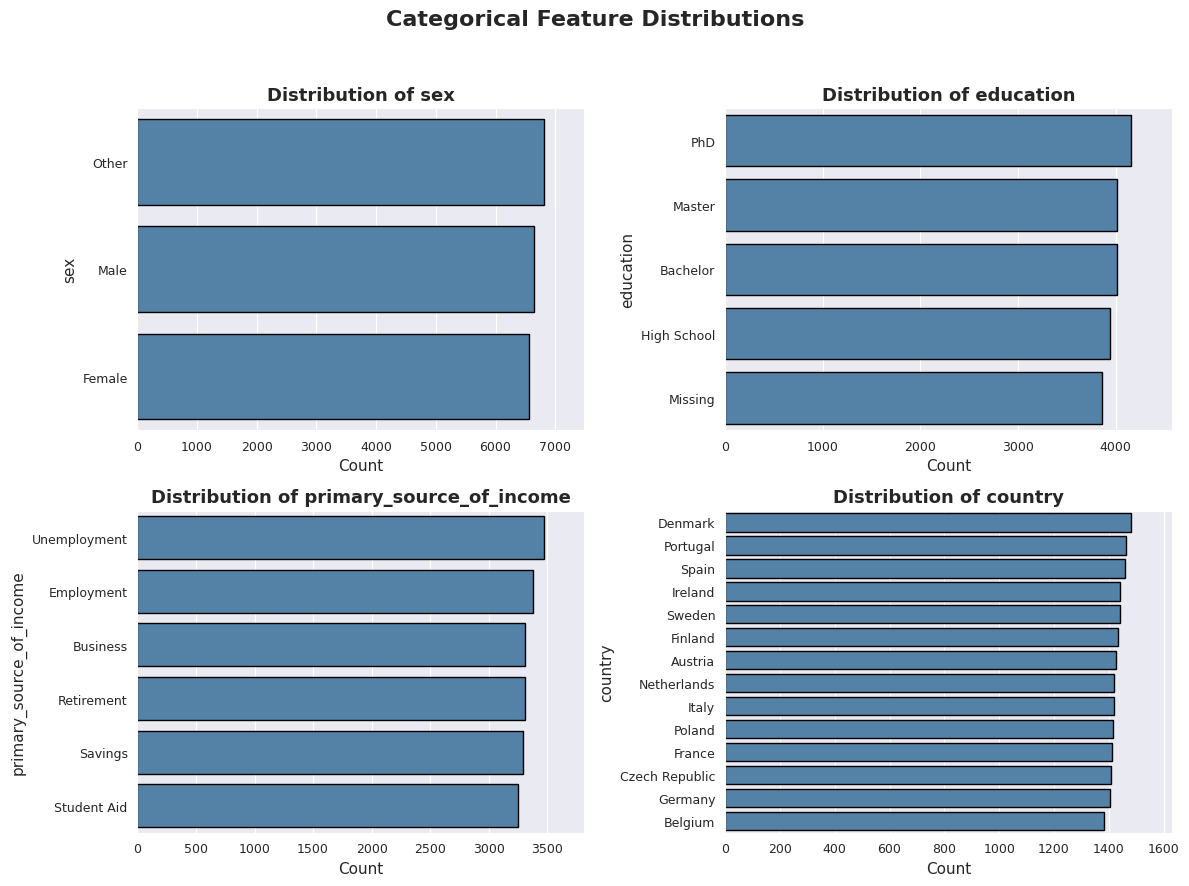

(<Figure size 1200x900 with 4 Axes>,
 array([<Axes: title={'center': 'Distribution of sex'}, xlabel='Count', ylabel='sex'>,
        <Axes: title={'center': 'Distribution of education'}, xlabel='Count', ylabel='education'>,
        <Axes: title={'center': 'Distribution of primary_source_of_income'}, xlabel='Count', ylabel='primary_source_of_income'>,
        <Axes: title={'center': 'Distribution of country'}, xlabel='Count', ylabel='country'>],
       dtype=object))

In [14]:
dist_categorical_visualisation(df, categorical_cols)

# Numerical data

In [15]:
numerical_cols = df.select_dtypes(include=["number"])

In [16]:
numerical_cols

,age,sum_of_monthly_installments,sum_of_monthly_expenses,risk_score
0,56,477.69,243.18,0.571079
1,36,31.60,737.76,0.705268
2,70,275.72,1477.50,0.429579
3,38,288.29,1135.03,0.581384
4,61,7.00,892.76,0.420227
...,...,...,...,...
19995,38,676.08,989.12,0.710221
19996,18,533.61,3862.27,0.427644
19997,53,142.07,281.32,0.411991
19998,47,472.89,1358.58,0.336819


In [17]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
age,20000.0,45.9733,18.0,32.0,46.0,60.0,74.0,16.520649
sum_of_monthly_installments,20000.0,301.669748,0.01,87.7675,207.65,418.2725,3165.7,304.160334
sum_of_monthly_expenses,20000.0,1184.221874,0.04,353.655,824.885,1651.9875,10994.33,1172.054772
signup_date,20000,2022-10-07 04:32:22.560000256,2020-04-21 00:00:00,2021-07-09 00:00:00,2022-10-08 00:00:00,2024-01-02 00:00:00,2025-03-22 00:00:00,NaN
risk_score,20000.0,0.501277,0.0,0.39848,0.500119,0.603234,1.0,0.149876


KeyError: 'a'

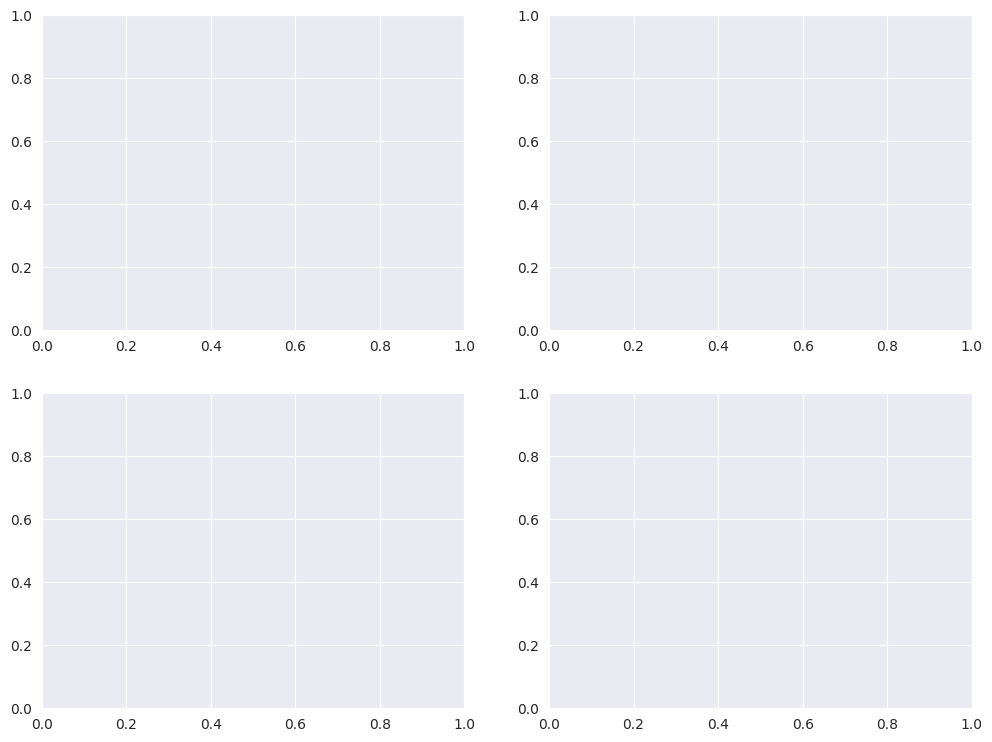

In [23]:
for col in numerical_cols.columns:
    dist_categorical_visualisation(df[col], col.replace("_", " "))

In [19]:
corr = numerical_cols.corr()

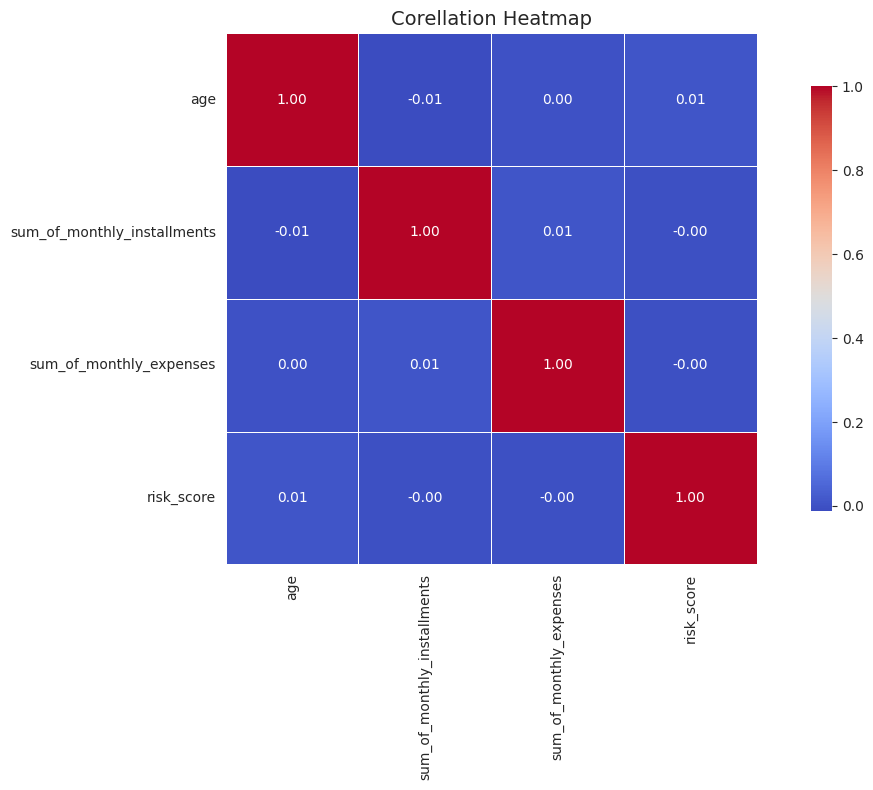

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    corr,
    ax=ax,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": 0.8},
    cmap="coolwarm",
)

ax.set_title("Corellation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()